# Simple Linear Regression Implementation

In [64]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Ordinary Least Square Libraries
import statsmodels.api as sm

In [65]:
# Import Data from CSV file
df=pd.read_csv("height-weight.csv")

### Data Profiling

In [66]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [67]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [68]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [69]:
df.shape

(23, 2)

In [70]:
df.dtypes

Weight    int64
Height    int64
dtype: object

### Handling Duplicates

In [71]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

In [72]:
df=df.drop_duplicates()

### Handling Null Values

In [73]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### Data Visualization

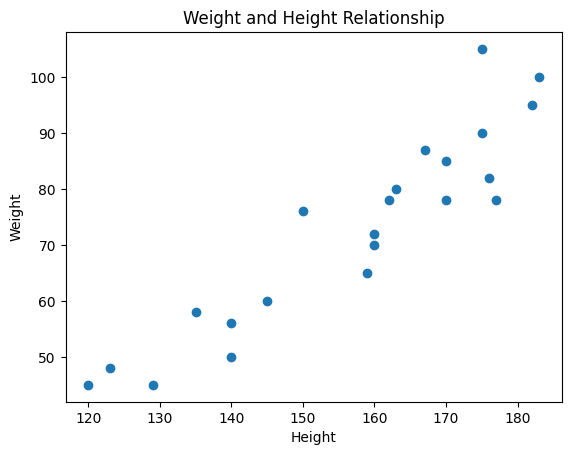

In [74]:
plt.scatter(df['Height'],df['Weight'])
plt.title("Weight and Height Relationship")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [75]:
df.corr()

,Weight,Height
Weight,1.000000,0.926124
Height,0.926124,1.000000


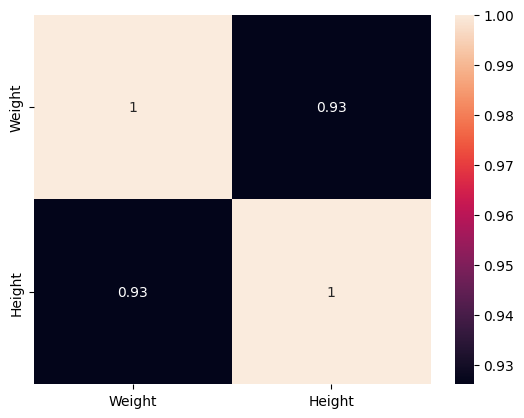

In [76]:
sns.heatmap(df.corr(),annot=True)
plt.show()

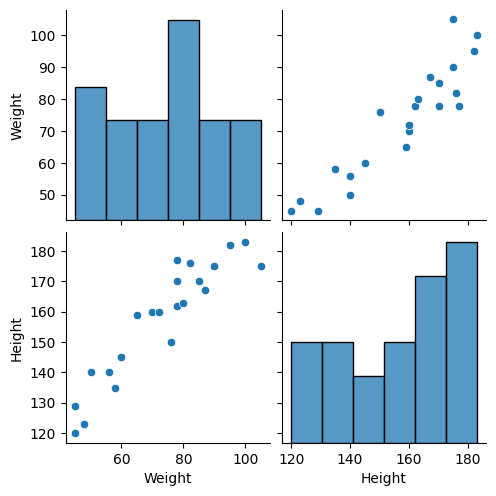

In [77]:
sns.pairplot(df)
plt.show()

### Independant and Dependant features

In [78]:
# Note:- Independant features should always be in a dataframe or 2 dimentional array
X=df[['Weight']]
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Weight
0,45
1,58
2,48
3,60
4,70


In [79]:
y=df['Height']
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

### Train-Test Split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=18)

In [81]:
X_train.shape

(16, 1)

### Standardization

In [82]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [83]:
X_test=scaler.transform(X_test)

In [84]:
X_test

array([[-1.52778505],
       [ 0.94136251],
       [ 1.06481989],
       [ 1.86729284],
       [ 1.25000595],
       [ 0.63271906]])

### Apply Simple Linear Regression

In [85]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [86]:
print("Coefficient/ Slope :",regression.coef_)
print("Intercept :",regression.intercept_)

Coefficient/ Slope : [15.98676596]
Intercept : 155.1875


### Plot Training Data and Best Fit Line

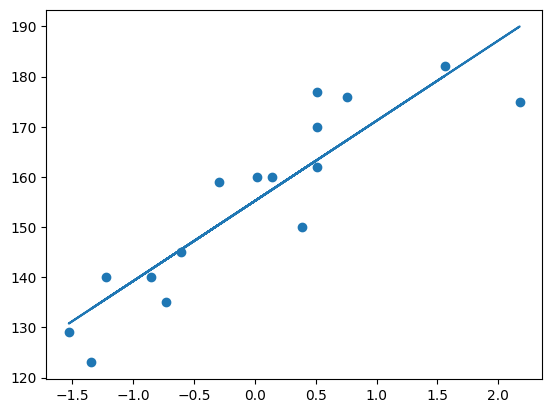

In [87]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### Prediction for Test Data

In [88]:
y_pred=regression.predict(X_test)


### Performance Metrics

In [89]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

print(mse)
print(mae)
print(rmse)
print(score)

25.42367843951989
3.45394736842105
5.0421898456444385
0.937940573377901


In [90]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9224257167223763

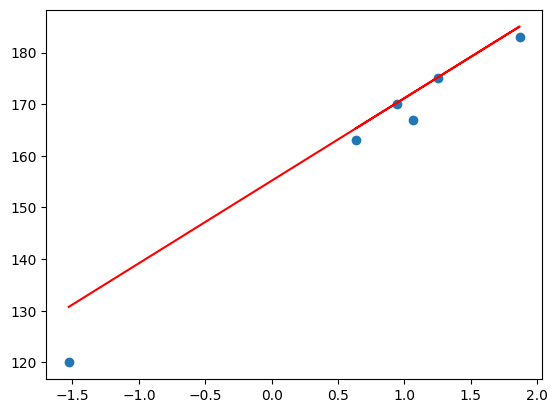

In [91]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')
plt.show()

In [92]:
residuals=y_test-y_pred
residuals

0    -10.763158
14    -0.236842
19    -5.210526
13    -2.039474
7     -0.171053
6     -2.302632
Name: Height, dtype: float64

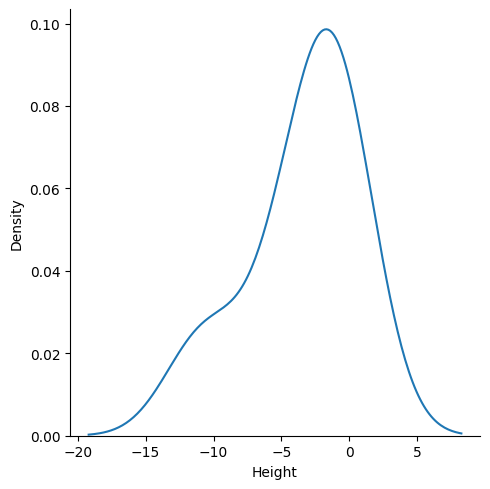

In [93]:
# Plot this residuals 
sns.displot(residuals,kind="kde")
plt.show()

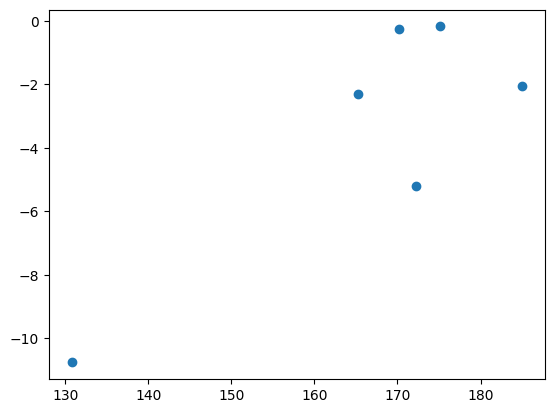

In [94]:
# Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred,residuals)
plt.show()

### Using Ordinary Least Squares

In [95]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.055
Method:                 Least Squares   F-statistic:                             0.1588
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                       0.696
Time:                        10:11:23   Log-Likelihood:                         -103.44
No. Observations:                  16   AIC:                                      208.9
Df Residuals:                      15   BIC:                                      209.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Projects\ML_Practice_Projects\dataSceince_ML_NLP_Practice\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [97]:
regression.coef_

array([15.98676596])